# Summarizing data

The **5-number summary** provides descriptive statistics that summarize data by five most important sample percentiles

|# | Quartile | Definition | Statistic | Percentile |
| --- | --- | --- | --- | --- |
|1.|$Q_0$||minimum|$0^{th}$|
|2.|$Q_1$|splits off the lowest 25% of data from the highest 75%|N/A|$25^{th}$|
|3.|$Q_2$|cuts data set in half|median|$50^{th}$|
|4.|$Q_3$|splits off the highest 25% of data from the lowest 75%|N/A|$75^{th}$|
|5.|$Q_4$||maximum|$100^{th}$|

## Medián (Me or ${\tilde  x}$) 

je hodnota, jež dělí řadu vzestupně seřazených výsledků na dvě stejně početné poloviny. Ve statistice patří mezi míry centrální tendence. Platí, že nejméně 50 % hodnot je menších nebo rovných a nejméně 50 % hodnot je větších nebo rovných mediánu. 

* není ovlivněn extrémními hodnotami. Proto se často používá v případě šikmých rozdělení, u kterých aritmetický průměr dává obvykle nevhodné výsledky.

## Kvantily 
(z lat. quantilis, jak malý/velký?) jsou ve statistice čísla (hodnoty), která dělí soubor seřazených (například naměřených) hodnot na několik zhruba stejně velkých částí. Kvantil je tedy míra polohy rozdělení pravděpodobnosti náhodné veličiny. Popisují body, ve kterých distribuční funkce náhodné proměnné prochází danou hodnotou.

## Kvartil
Tři kvartily rozdělují statistický soubor na čtvrtiny. 25 % prvků má hodnoty menší než dolní kvartil $Q_{0,25}$ a 75 % prvků hodnoty menší než horní kvartil $Q_{0,75}$; někdy se označují $Q_{1}$ a $Q_{3}$.

# Box Plot (also called box-and-whisker plot). 

* The box has an upper bound of $Q_3$ and a lower bound of $Q_1$. 
* The median will be a line somewhere in this box. 
* The whiskers extend from the box towards the minimum/maximum. 

## Whiskers
* extends from $Q_3 + 1.5 \times IQR$ (interquartile range) to $Q_1 - 1.5 \times IQR$ 
* anything beyond will be represented as individual points for outliers

## Outliers
* are extreme values that might be errors in measurement and recording, 
* accurate reports of rare events.

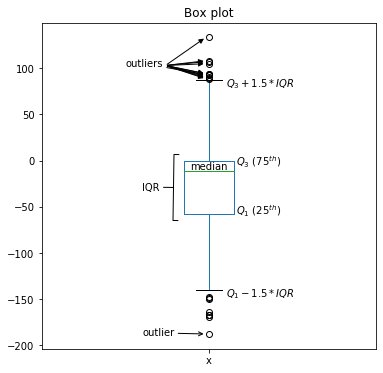

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

def example_boxplot():
    """
    Generate an example box plot.
    taken from 
    [Hands-On Data Analysis with Pandas](https://www.packtpub.com/big-data-and-business-intelligence/hands-data-analysis-pandas)
    """
    non_symmetric = pd.Series(np.random.gamma(7, 5, size=1000) * np.random.choice([-2.2, -1.85, 0, -0.4, 1.33], size=1000), name='x')

    # find the quartiles and iqr
    q1_y, median_y, q3_y = non_symmetric.quantile([0.25, 0.5, 0.75])
    iqr = q3_y - q1_y

    # make the boxplot
    ax = non_symmetric.plot(kind='box', figsize=(6, 6), title='Box plot')

    # label the box
    ax.annotate('median', xy=(0.945, median_y + 2))
    ax.annotate(r'$Q_3$ ($75^{th}$)', xy=(1, q3_y), xytext=(1.08, q3_y - 5))
    ax.annotate(r'$Q_1$ ($25^{th}$)', xy=(1, q1_y), xytext=(1.08, q1_y))
    ax.annotate(
        'IQR', xy=(0.9, (q3_y + q1_y)/2), xytext=(0.8, (q3_y + q1_y)/2 - 2.85),
        arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=0.5')
    )

    # label the whiskers
    ax.annotate(r'$Q_3 + 1.5 * IQR$', xy=(1.05, q3_y + 1.5 * iqr - 7))
    ax.annotate(r'$Q_1 - 1.5 * IQR$', xy=(1.05, q1_y - 1.5 * iqr - 2))

    # label the outliers
    ax.annotate(
        'outlier', xy=(0.99, non_symmetric.min()), xytext=(0.8, non_symmetric.min() - 2.1),
        arrowprops=dict(arrowstyle='->')
    )

    for i, val in enumerate(non_symmetric[non_symmetric > q3_y + 1.5*iqr]):
        if not i: 
            text = 'outliers' 
            x, y = 0.75, 102
        else:
            text = '' 
            x, y = 0.87, 103
        ax.annotate(
            text, xy=(0.99, val), xytext=(x, y),
            arrowprops=dict(facecolor='black', arrowstyle='-|>')
        )

    return ax

example_boxplot();